                                    Doctor's Consultation Fees Prediction

We have all been in situation where we go to a doctor in emergency and find that the consultation fees are too high. As a data scientist we all should do better. What if you have data that records important details about a doctor and you get to build a model to predict the doctor’s consulting fee.? This is the use case that let's you do that. 

In [142]:
#importing the libary
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Data Visualisation
import matplotlib.pyplot as plt 
import seaborn as sns

In [143]:
# print top data

df=pd.read_csv(r'D:\Vishakha_eval\2\Doctor_fee_consultation\Final Participant Data Folder\Final_Train.csv',encoding= 'unicode_escape')

df.head(5)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24 years experience,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12 years experience,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9 years experience,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12 years experience,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20 years experience,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [144]:
df1=pd.read_csv(r'D:\Vishakha_eval\2\Doctor_fee_consultation\Final Participant Data Folder\Final_Test.csv',encoding= 'unicode_escape')

df1.head(5)

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info
0,MBBS,35 years experience,NaN,"Ghatkopar East, Mumbai",General Medicine,NaN
1,"MBBS, Diploma in Otorhinolaryngology (DLO)",31 years experience,NaN,"West Marredpally, Hyderabad",ENT Specialist,NaN
2,"MBBS, DDVL",40 years experience,70%,"KK Nagar, Chennai",Dermatologists,"70% 4 Feedback KK Nagar, Chennai"
3,BAMS,0 years experience,NaN,"New Ashok Nagar, Delhi",Ayurveda,NaN
4,"BDS, MDS - Conservative Dentistry & Endodontics",16 years experience,100%,"Kanakpura Road, Bangalore",Dentist,General Dentistry Conservative Dentistry Cosme...


In [145]:
df.shape

(5961, 7)

In [146]:
df1.shape

(1987, 6)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       5961 non-null   object
 1   Experience          5961 non-null   object
 2   Rating              2659 non-null   object
 3   Place               5936 non-null   object
 4   Profile             5961 non-null   object
 5   Miscellaneous_Info  3341 non-null   object
 6   Fees                5961 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 326.1+ KB


In [148]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Qualification       1987 non-null   object
 1   Experience          1987 non-null   object
 2   Rating              897 non-null    object
 3   Place               1981 non-null   object
 4   Profile             1987 non-null   object
 5   Miscellaneous_Info  1153 non-null   object
dtypes: object(6)
memory usage: 93.3+ KB


In [149]:
df.columns.values

array(['Qualification', 'Experience', 'Rating', 'Place', 'Profile',
       'Miscellaneous_Info', 'Fees'], dtype=object)

In [150]:
print(df['Qualification'].unique())
print(df['Experience'].unique())
print(df['Rating'].unique())
print(df['Profile'].unique())
print(df['Miscellaneous_Info'].unique())

['BHMS, MD - Homeopathy' 'BAMS, MD - Ayurveda Medicine'
 'MBBS, MS - Otorhinolaryngology' ...
 'MD - Dermatology , Venereology & Leprosy, MBBS, Fellowship In Dermatosurgery'
 'BDS, certification in smile designing'
 'MD - Homeopathy, Post Graduate Diploma in Healthcare Management(PGDHM), DHMS (Diploma in Homeopathic Medicine and Surgery)']
['24 years experience' '12 years experience' '9 years experience'
 '20 years experience' '8 years experience' '42 years experience'
 '10 years experience' '14 years experience' '23 years experience'
 '5 years experience' '7 years experience' '21 years experience'
 '19 years experience' '41 years experience' '31 years experience'
 '25 years experience' '16 years experience' '15 years experience'
 '11 years experience' '22 years experience' '38 years experience'
 '6 years experience' '36 years experience' '13 years experience'
 '18 years experience' '46 years experience' '40 years experience'
 '49 years experience' '33 years experience' '0 years experi

In [151]:
df.describe()

,Fees
count,5961.000000
mean,307.944640
std,190.920373
min,5.000000
25%,150.000000
50%,300.000000
75%,500.000000
max,950.000000


In [152]:
df.isnull().sum()

Qualification            0
Experience               0
Rating                3302
Place                   25
Profile                  0
Miscellaneous_Info    2620
Fees                     0
dtype: int64

# Cleaning the data

In [153]:
df = df.replace('?',np.NaN)
df.isnull().any()

Qualification         False
Experience            False
Rating                 True
Place                  True
Profile               False
Miscellaneous_Info     True
Fees                  False
dtype: bool

In [154]:
df['Fees'].max()

950

In [155]:
df[df['Fees']==950]

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
293,"MBBS, MD - Internal Medicine, FRCP",29 years experience,100%,"Adyar, Chennai",General Medicine,"100% 175 Feedback Adyar, Chennai",950


In [156]:
def changeexperience(x):
    bans=x.split(' ')
    return bans[0]

In [157]:
df['Experience']=df['Experience'].apply(changeexperience)

In [158]:
df1['Experience']=df1['Experience'].apply(changeexperience)

In [159]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Miscellaneous_Info,Fees
0,"BHMS, MD - Homeopathy",24,100%,"Kakkanad, Ernakulam",Homeopath,"100% 16 Feedback Kakkanad, Ernakulam",100
1,"BAMS, MD - Ayurveda Medicine",12,98%,"Whitefield, Bangalore",Ayurveda,"98% 76 Feedback Whitefield, Bangalore",350
2,"MBBS, MS - Otorhinolaryngology",9,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,NaN,300
3,"BSc - Zoology, BAMS",12,NaN,"Bannerghatta Road, Bangalore",Ayurveda,"Bannerghatta Road, Bangalore ?250 Available on...",250
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,"100% 4 Feedback Keelkattalai, Chennai",250


In [160]:
df.drop('Miscellaneous_Info',axis=1,inplace=True)

In [161]:
df1.drop('Miscellaneous_Info',axis=1,inplace=True)

In [162]:
def changequali(x):
    bans=x.split(' ')
    sans=x.split(',')
    if ',' not in x:
        return bans[0]
    else:
        return sans[0]

In [163]:
df['Qualification']=df['Qualification'].apply(changequali)

In [164]:
def removeminus(x):
    cabs=x.split('-')
    if '-' in x:
        return cabs[0]
    else:
        return x

In [165]:
df['Qualification']=df['Qualification'].apply(removeminus)

In [166]:
df1['Qualification']=df1['Qualification'].apply(changequali)

In [167]:
df1['Qualification']=df1['Qualification'].apply(removeminus)

In [168]:
df1['Qualification'].value_counts()

MBBS                                                                   865
BDS                                                                    371
BHMS                                                                   232
BAMS                                                                   228
MD                                                                      74
MDS                                                                     48
MS                                                                      31
MD                                                                      18
MDS                                                                     13
DDVL                                                                    13
DNB                                                                     13
DHMS (Diploma in Homeopathic Medicine and Surgery)                       7
B.Sc                                                                     6
Diploma in Otorhinolaryng

In [169]:
def stillqua(x):
    dab=x.strip('.')
    tab= dab.lower()
    mylist=['bsc','diploma','certifi','doctor']
    if mylist[0] in tab:
        return 'BSC'
    elif mylist[1] in tab:
        return 'Diploma'
    elif mylist[2] in tab:
        return 'Certification'
    elif mylist[3] in tab:
        return 'PhD'
    else:
        return x

In [170]:
df1['Qualification']=df1['Qualification'].apply(stillqua)

In [171]:
df1['Qualification'].value_counts()

MBBS                                         865
BDS                                          371
BHMS                                         232
BAMS                                         228
MD                                            74
MDS                                           48
MS                                            31
Diploma                                       23
MD                                            18
MDS                                           13
DNB                                           13
DDVL                                          13
B.Sc                                           6
Get                                            6
BSC                                            5
MS                                             5
LCEH                                           5
DHMS                                           4
Certification                                  3
BSAM                                           2
DM                  

In [172]:
df['Qualification']=df['Qualification'].apply(stillqua)

In [173]:
df[df['Fees']>800]

,Qualification,Experience,Rating,Place,Profile,Fees
275,MD,6,NaN,"Chanakyapuri, Delhi",Dermatologists,900
293,MBBS,29,100%,"Adyar, Chennai",General Medicine,950
987,MBBS,25,93%,"Shalimar Bagh, Delhi",ENT Specialist,900
1314,MBBS,33,100%,"Mira-Bhayandar Road, Mumbai",General Medicine,900
1631,MBBS,6,NaN,"Kandivali West, Mumbai",Dermatologists,900
2165,MBBS,8,100%,"Kandivali West, Mumbai",General Medicine,900
2252,MBBS,46,95%,"Richmond Town, Bangalore",ENT Specialist,900
2393,BHMS,19,100%,"Mulund West, Mumbai",Homeopath,900
2428,MA,6,NaN,"Vasant Kunj, Delhi",Homeopath,900
2522,BHMS,27,98%,"Mulund West, Mumbai",Homeopath,900


In [174]:
df[df['Fees']>800]['Profile'].value_counts()

General Medicine    7
Dermatologists      5
Homeopath           4
ENT Specialist      3
Dentist             1
Ayurveda            1
Name: Profile, dtype: int64

In [175]:
df['Experience']=df['Experience'].astype(int)

In [176]:
df1['Experience']=df1['Experience'].astype(int)

In [177]:
df['Experience'].max()

66

In [178]:
df1['Experience'].max()

65

In [179]:
df[df['Experience']==66]

,Qualification,Experience,Rating,Place,Profile,Fees
372,MBBS,66,NaN,"Greams Road, Chennai",ENT Specialist,100


In [180]:
caps=df[df['Rating'].notnull()]

In [181]:
caps.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,BHMS,24,100%,"Kakkanad, Ernakulam",Homeopath,100
1,BAMS,12,98%,"Whitefield, Bangalore",Ayurveda,350
4,BAMS,20,100%,"Keelkattalai, Chennai",Ayurveda,250
7,BDS,10,99%,"Arekere, Bangalore",Dentist,200
12,BDS,9,98%,"Coimbatore Racecourse, Coimbatore",Dentist,200


In [182]:
def removepercent(x):
    vans=x.split('%')
    return vans[0]

In [183]:
caps['Rating']=caps['Rating'].apply(removepercent)

<ipython-input-183-a0f522b96dbb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caps['Rating']=caps['Rating'].apply(removepercent)


In [184]:
df['Profile'].value_counts()

Dentist             1397
General Medicine    1173
Dermatologists      1034
Homeopath            843
Ayurveda             786
ENT Specialist       728
Name: Profile, dtype: int64

In [185]:
caps['Rating']=caps['Rating'].astype(int)

<ipython-input-185-06b8ccc1f3d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caps['Rating']=caps['Rating'].astype(int)


In [186]:
def Placeexactly(x):
    wans=str(x).split(' ')
    return wans[-1]

In [187]:
caps.groupby('Profile')['Rating'].mean()

Profile
Ayurveda            96.327957
Dentist             97.706016
Dermatologists      93.506270
ENT Specialist      89.315789
General Medicine    91.592308
Homeopath           96.657692
Name: Rating, dtype: float64

In [188]:
def fillratings(cols):
    Rating = cols[0]
    Profile = cols[1]
    
    if pd.isnull(Rating):

        if Profile == 'Ayurveda':
            return '96%'

        elif Profile == 'Dentist':
            return '98%'
        elif Profile=='Dermatologists':
            return '94%'
        elif Profile=='ENT Specialist':
            return '89%'
        elif Profile=='General Medicine':
            return '92%'
        elif Profile=='Homeopath':
            return '97%'
    else:
        return Rating

In [189]:
df['Rating']=df[['Rating','Profile']].apply(fillratings,axis=1)

In [190]:
baps=df1[df1['Rating'].notnull()]

In [191]:
baps['Rating']=baps['Rating'].apply(removepercent)

<ipython-input-191-58ad022e1137>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baps['Rating']=baps['Rating'].apply(removepercent)


In [192]:
df1['Profile'].value_counts()

General Medicine    444
Dentist             441
Dermatologists      339
Homeopath           277
Ayurveda            251
ENT Specialist      235
Name: Profile, dtype: int64

In [193]:
baps['Rating']=baps['Rating'].astype(int)

<ipython-input-193-9a6133e70778>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  baps['Rating']=baps['Rating'].astype(int)


In [194]:
baps.groupby('Profile')['Rating'].mean()

Profile
Ayurveda            96.126984
Dentist             97.674912
Dermatologists      93.263158
ENT Specialist      88.000000
General Medicine    92.871622
Homeopath           96.126437
Name: Rating, dtype: float64

In [195]:
def testfillratings(cols):
    Rating = cols[0]
    Profile = cols[1]
    
    if pd.isnull(Rating):

        if Profile == 'Ayurveda':
            return '96%'

        elif Profile == 'Dentist':
            return '98%'
        elif Profile=='Dermatologists':
            return '93%'
        elif Profile=='ENT Specialist':
            return '88%'
        elif Profile=='General Medicine':
            return '93%'
        elif Profile=='Homeopath':
            return '96%'
    else:
        return Rating

In [196]:
df1['Rating']=df1[['Rating','Profile']].apply(testfillratings,axis=1)

In [197]:
df['Rating']=df['Rating'].apply(removepercent)

In [198]:
df1['Rating']=df1['Rating'].apply(removepercent)

In [199]:
df['Rating']=df['Rating'].astype(int)

In [200]:
df1['Rating']=df1['Rating'].astype(int)

In [201]:
taps=df[df['Place'].notnull()]

In [202]:
taps['Place']=taps['Place'].apply(Placeexactly)

<ipython-input-202-905b6da94468>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taps['Place']=taps['Place'].apply(Placeexactly)


In [203]:
taps['Place'].value_counts()

Bangalore             1258
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
e                        1
Name: Place, dtype: int64

In [204]:
taps[taps['Place']=='e']

,Qualification,Experience,Rating,Place,Profile,Fees
3980,BDS,23,98,e,Dentist,250


In [205]:
df['Place'].fillna('Malleswaram, Bangalore',inplace=True)

In [206]:
df['Place']=df['Place'].apply(Placeexactly)

In [207]:
def removethee(x):
    if x=='e':
        return 'Bangalore'
    else:
        return x

In [208]:
df['Place']=df['Place'].apply(removethee)

In [209]:
df['Place'].value_counts()

Bangalore             1284
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Name: Place, dtype: int64

In [210]:
fraps=df1[df1['Place'].notnull()]

In [211]:
fraps['Place']=fraps['Place'].apply(Placeexactly)

<ipython-input-211-3ceace818707>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fraps['Place']=fraps['Place'].apply(Placeexactly)


In [212]:
fraps['Place'].value_counts()

Bangalore             420
Delhi                 417
Mumbai                389
Hyderabad             333
Chennai               287
Coimbatore             70
Ernakulam              48
Thiruvananthapuram     17
Name: Place, dtype: int64

In [213]:
df1['Place'].fillna('Malleswaram, Bangalore',inplace=True)

In [214]:
df1['Place']=df1['Place'].apply(Placeexactly)

In [215]:
df1['Place'].value_counts()

Bangalore             426
Delhi                 417
Mumbai                389
Hyderabad             333
Chennai               287
Coimbatore             70
Ernakulam              48
Thiruvananthapuram     17
Name: Place, dtype: int64

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5961 entries, 0 to 5960
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  5961 non-null   object
 1   Experience     5961 non-null   int32 
 2   Rating         5961 non-null   int32 
 3   Place          5961 non-null   object
 4   Profile        5961 non-null   object
 5   Fees           5961 non-null   int64 
dtypes: int32(2), int64(1), object(3)
memory usage: 233.0+ KB


In [217]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Qualification  1987 non-null   object
 1   Experience     1987 non-null   int32 
 2   Rating         1987 non-null   int32 
 3   Place          1987 non-null   object
 4   Profile        1987 non-null   object
dtypes: int32(2), object(3)
memory usage: 62.2+ KB


Prepoccesing

converting categorical variables to meaningful numbers

In [218]:
df[df['Rating']<50]

,Qualification,Experience,Rating,Place,Profile,Fees
55,MBBS,25,36,Bangalore,ENT Specialist,600
692,MBBS,29,33,Delhi,Dermatologists,500
911,Diploma,31,45,Mumbai,Homeopath,500
2585,MRCPCH (UK),19,7,Hyderabad,General Medicine,100
3126,MBBS,38,48,Delhi,ENT Specialist,800
3604,MBBS,33,40,Chennai,General Medicine,700
5028,MBBS,30,47,Bangalore,ENT Specialist,650
5127,MBBS,19,33,Bangalore,ENT Specialist,650


In [219]:
df['Fees'].min()

5

In [220]:
df[df['Fees']==5]

,Qualification,Experience,Rating,Place,Profile,Fees
1930,BDS,6,98,Thiruvananthapuram,Dentist,5


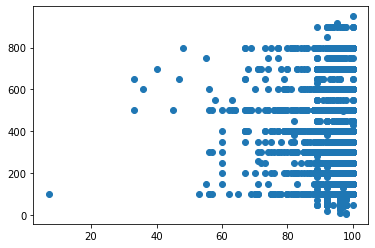

In [221]:
plt.scatter(df['Rating'],df['Fees'])

In [222]:
df.groupby('Place')['Fees'].mean()

Place
Bangalore             324.364486
Chennai               283.602339
Coimbatore            154.298246
Delhi                 362.911392
Ernakulam             188.431373
Hyderabad             307.507886
Mumbai                308.292863
Thiruvananthapuram    167.267442
Name: Fees, dtype: float64

In [223]:
def crat(x):
    if x<=50: #50 because of max rating is 100
        return 1 #because of the meaningful magnitude
    if x>50:
        return 2

In [224]:
df['Rating']=df['Rating'].apply(crat)

In [225]:
df1['Rating']=df1['Rating'].apply(crat)

In [228]:
df.groupby('Rating')['Fees'].mean()

Rating
1    562.500000
2    307.602553
Name: Fees, dtype: float64

In [229]:
df['Rating'].value_counts(normalize=True)

2    0.998658
1    0.001342
Name: Rating, dtype: float64

In [230]:
def exper(x):
    if x<=33:#33 because the max experience is 66
        return 1 #for meaningful magnitude
    if x>33:
        return 2

In [231]:
df['Experience']=df['Experience'].apply(exper)

In [232]:
df1['Experience']=df1['Experience'].apply(exper)

In [233]:
df.groupby('Experience')['Fees'].mean()

Experience
1    312.954683
2    268.045113
Name: Fees, dtype: float64

In [234]:
df['Experience'].value_counts(normalize=True)

1    0.888442
2    0.111558
Name: Experience, dtype: float64

Transforming Place

In [235]:
df['Place'].value_counts()

Bangalore             1284
Mumbai                1219
Delhi                 1185
Hyderabad              951
Chennai                855
Coimbatore             228
Ernakulam              153
Thiruvananthapuram      86
Name: Place, dtype: int64

In [236]:
place=df.groupby('Place')['Fees'].mean()

In [237]:
df['Place']=df['Place'].map(place)

In [238]:
df1['Place']=df1['Place'].map(place)

In [239]:
df.head()

,Qualification,Experience,Rating,Place,Profile,Fees
0,BHMS,1,2,188.431373,Homeopath,100
1,BAMS,1,2,324.364486,Ayurveda,350
2,MBBS,1,2,324.364486,ENT Specialist,300
3,BSC,1,2,324.364486,Ayurveda,250
4,BAMS,1,2,283.602339,Ayurveda,250


In [240]:
profile=df.groupby('Profile')['Fees'].mean()

In [241]:
df['Profile']=df['Profile'].map(profile)

In [242]:
df1['Profile']=df1['Profile'].map(profile)

In [243]:
qualification=df.groupby('Qualification')['Fees'].mean()

In [244]:
df['Qualification']=df['Qualification'].map(qualification)

In [245]:
df1['Qualification']=df1['Qualification'].map(qualification)

<AxesSubplot:>

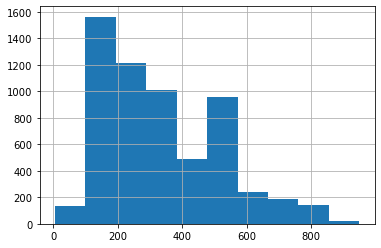

In [246]:
df['Fees'].hist()

In [247]:
df['Fees']=np.log(df['Fees'])

<AxesSubplot:>

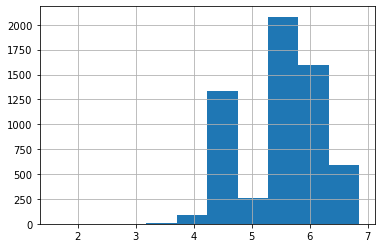

In [248]:
df['Fees'].hist()

Data spliting

In [249]:
X=df.drop('Fees',axis=1)
y=df['Fees']

In [250]:
from sklearn.model_selection import train_test_split

In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [252]:
! pip install lightgbm

In [253]:
import lightgbm as lgb

In [254]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'eval_metric': 'rmsle',
    'max_depth': 7, 
    'learning_rate': 0.1,
    'verbose': 0, 
    'early_stopping_round': 30}
n_estimators = 700

In [255]:
d_train = lgb.Dataset(X_train, label=y_train)

In [256]:
d_valid = lgb.Dataset(X_test, label=y_test)

In [257]:
watchlist = [d_valid]

In [258]:
model = lgb.train(params, d_train, n_estimators, watchlist, verbose_eval=1)

[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000243 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] Unknown parameter: eval_metric
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[1]	valid_0's l2: 0.440246
Training until validation scores don't improve for 30 rounds
[2]	valid_0's l2: 0.427177
[3]	valid_0's l2: 0.416708
[4]	valid_0's l2: 0.408357
[5]	valid_0's l2: 0.401524
[6]	valid_0's l2: 0.396379
[7

C:\ProgramData\Anaconda3\lib\site-packages\lightgbm\engine.py:153: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


In [259]:
preds = model.predict(df1)

In [260]:
preds = np.exp(preds)

In [261]:
Doctor=pd.DataFrame()

In [262]:
Doctor['Fees']=preds

In [263]:
Doctor.to_excel('doctor1.xlsx',index=False)

In [264]:
Doctor.head()

,Fees
0,181.418415
1,344.673649
2,253.090759
3,246.189086
4,215.212146


In [265]:
prete=model.predict(X_test)

In [266]:
from sklearn.metrics import mean_squared_error

In [267]:
np.sqrt(mean_squared_error(y_test,prete))

0.6147351496684083